In [1]:
!conda update -n base -c defaults conda -y
!conda install -c anaconda fastparquet -y
!conda install -c conda-forge python-snappy -y

Solving environment: done

## Package Plan ##

  environment location: /home/ec2-user/anaconda3

  added / updated specs: 
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tqdm-4.36.1                |             py_0          50 KB
    certifi-2019.9.11          |           py36_0         154 KB
    conda-4.7.12               |           py36_0         3.0 MB
    conda-package-handling-1.6.0|   py36h7b6447c_0         871 KB
    openssl-1.0.2t             |       h7b6447c_1         3.1 MB
    ------------------------------------------------------------
                                           Total:         7.2 MB

The following NEW packages will be INSTALLED:

    conda-package-handling: 1.6.0-py36h7b6447c_0
    tqdm:                   4.36.1-py_0         

The following packages will be UPDATED:

    ca-certificates:        2019.5.15-0          --> 2019.8.28-0      
    

In [1]:
import pandas as pd
import fastparquet as fp
import s3fs
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
s3=s3fs.S3FileSystem()
myopen=s3.open

# Sample data: id = 98, date is from 2019-02-21 to 2019-02-26

In [5]:
##### Loaing RMS Data from S3
s3_path_21_98feb = f"cleaning-data-column-filter/id=98/year=2019/month=2/day=21/*.parquet"
s3_path_22_98feb = f"cleaning-data-column-filter/id=98/year=2019/month=2/day=22/*.parquet"
s3_path_23_98feb = f"cleaning-data-column-filter/id=98/year=2019/month=2/day=23/*.parquet"
s3_path_24_98feb = f"cleaning-data-column-filter/id=98/year=2019/month=2/day=24/*.parquet"
s3_path_25_98feb = f"cleaning-data-column-filter/id=98/year=2019/month=2/day=25/*.parquet"
s3_path_26_98feb = f"cleaning-data-column-filter/id=98/year=2019/month=2/day=26/*.parquet"

paths_from_s3_21_98feb = s3.glob(path=s3_path_21_98feb)
paths_from_s3_22_98feb = s3.glob(path=s3_path_22_98feb)
paths_from_s3_23_98feb = s3.glob(path=s3_path_23_98feb)
paths_from_s3_24_98feb = s3.glob(path=s3_path_24_98feb)
paths_from_s3_25_98feb = s3.glob(path=s3_path_25_98feb)
paths_from_s3_26_98feb = s3.glob(path=s3_path_26_98feb)

all_paths_from_s3_98feb = []
all_paths_from_s3_98feb = paths_from_s3_21_98feb + paths_from_s3_22_98feb + paths_from_s3_23_98feb + paths_from_s3_24_98feb + paths_from_s3_25_98feb + paths_from_s3_26_98feb

In [9]:
fp_obj_98feb = fp.ParquetFile(all_paths_from_s3_98feb,open_with=myopen)
df_nor = fp_obj_98feb.to_pandas()

# standardization & sort

In [12]:
df_nor =  (df.select_dtypes('float64') - df.select_dtypes('float64').mean()) / (df.select_dtypes('float64').std())

In [21]:
st98_feb = df_nor.sort_values(by='datetime').reset_index(drop=True)

In [48]:
st98_feb.shape

(518381, 268)

# shutdown 2019-03-25 20:22:40.680560 & index number : 426022

# devide data by 10 min(600 sec = 10 min)

In [98]:
st98_feb_normal_600 = st98_feb[:600]
st98_feb_pre = st98_feb[:426022]

In [101]:
features98feb = st98_feb.select_dtypes('float64').columns.tolist()

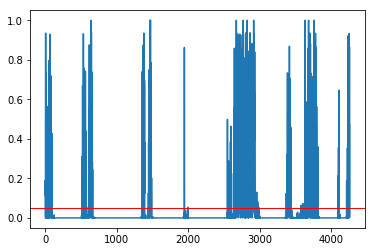

0 ainat160_value_d



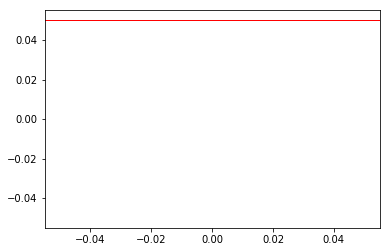

1 ainbsc001_status1_value_d



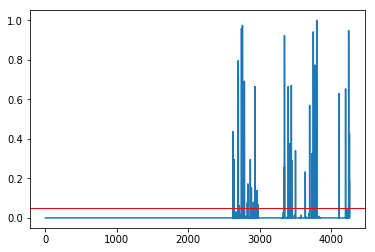

2 ainct430_value_d



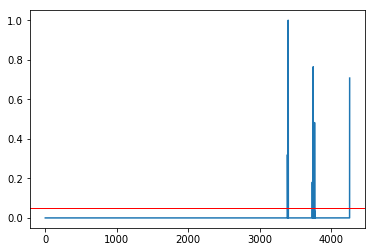

3 ainct450_value_d



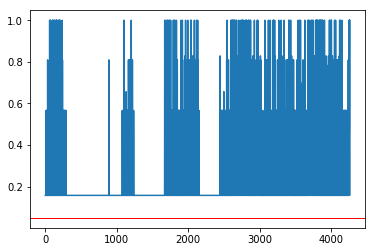

4 ainextpowmeas_value_d



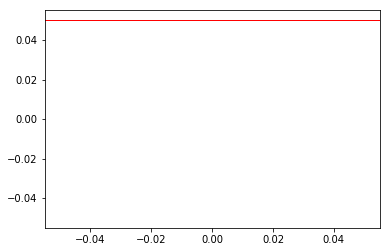

5 ainfan150control_value_d



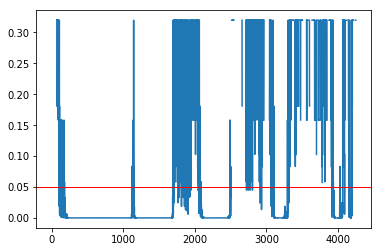

6 ainft000hrm_value_d



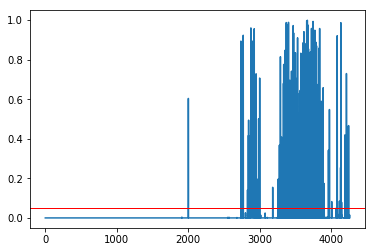

7 ainft012_value_d



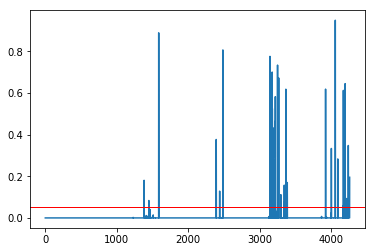

8 ainft140_value_d



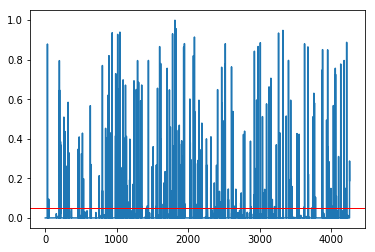

9 ainft490hrm_value_d



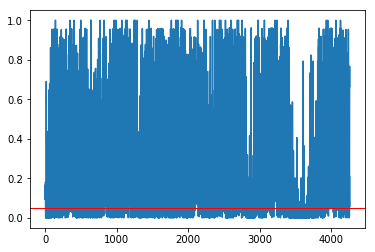

10 ainft800hrm_value_d



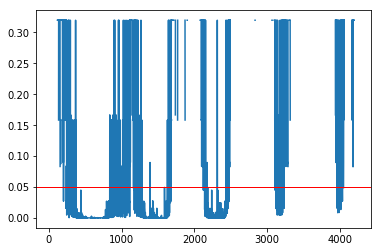

11 ainft880hrm_value_d



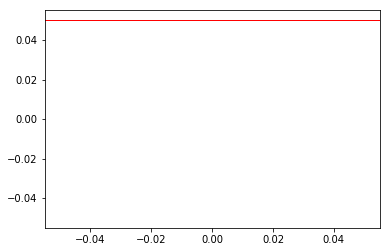

12 ainhtr310a_status_value_d



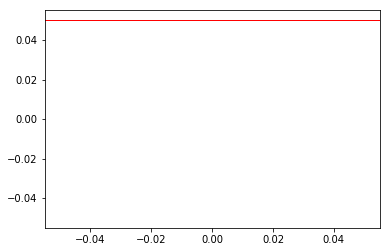

13 ainhtr310b_status_value_d



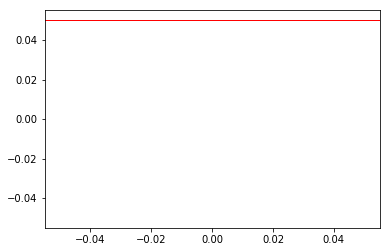

14 ainhtr311a_status_value_d



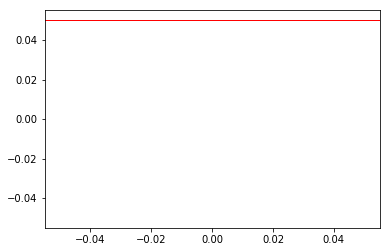

15 ainhtr311b_status_value_d



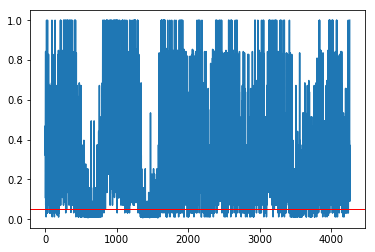

16 ainjt101hrm_value_d



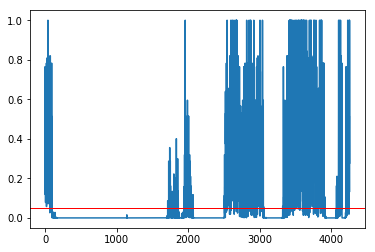

17 ainjt102hrm_value_d



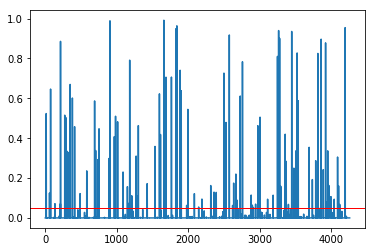

18 ainlt400_value_d



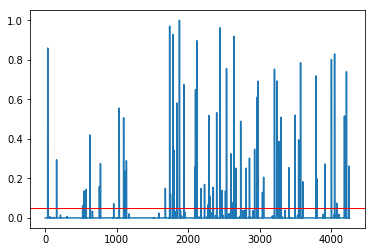

19 ainlt450_value_d



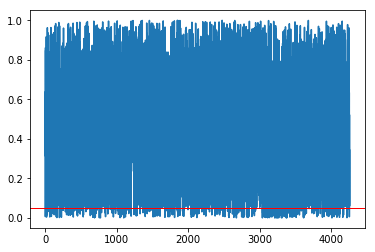

20 ainpcs_acfrequency_value_d



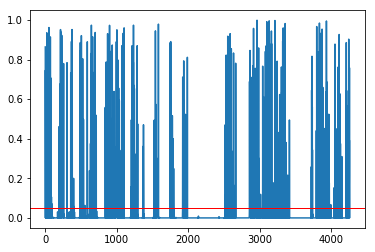

21 ainpcs_ct001a_value_d



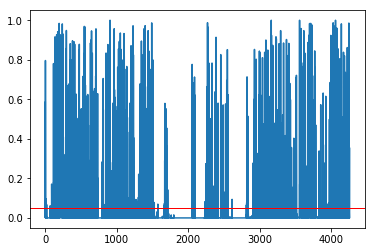

22 ainpcs_ct001b_value_d



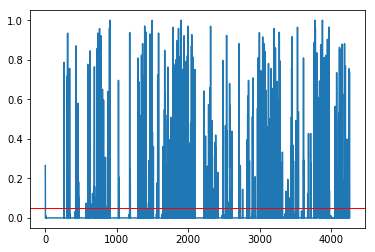

23 ainpcs_ct001c_value_d



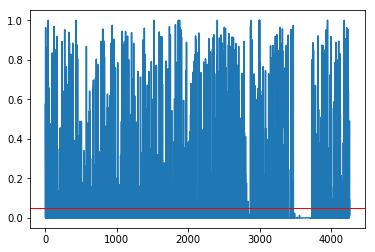

24 ainpcs_ecs_temp_value_d



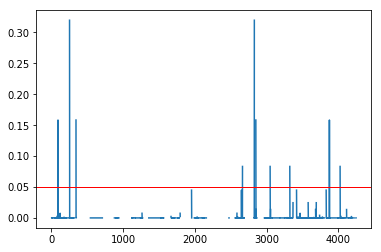

25 ainpcs_esm_enclosuretemp_value_d



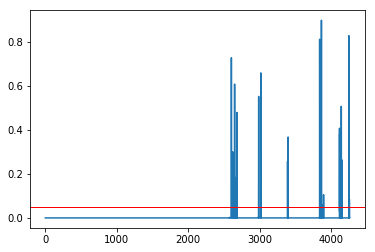

26 ainpcs_esm_inletairtemp_value_d



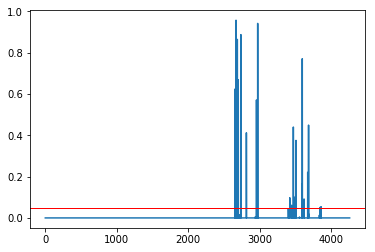

27 ainpcs_fan150_status_value_d



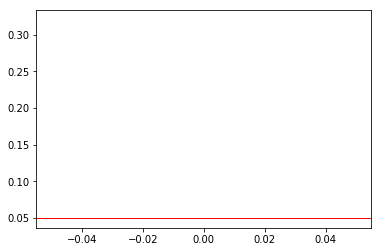

28 ainpcs_faultword1_value_d



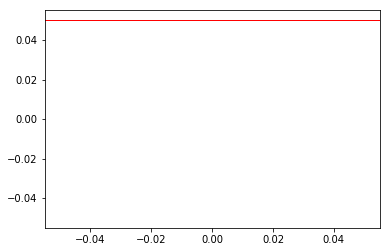

29 ainpcs_gridstatusword1_value_d



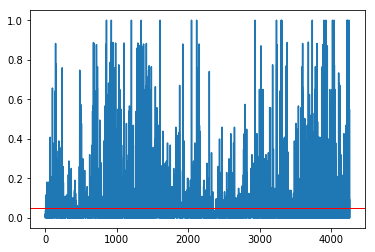

30 ainpcs_gridvac_ab_value_d



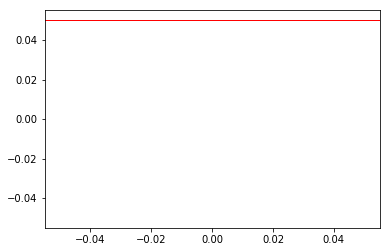

31 ainpcs_gridvac_bc_value_d



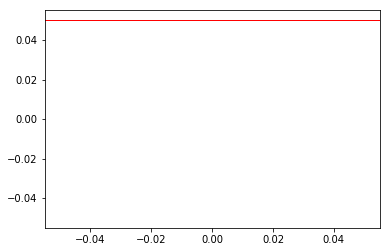

32 ainpcs_gridvac_ca_value_d



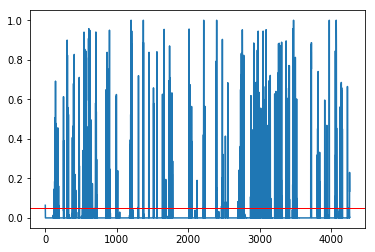

33 ainpcs_invvac_ab_value_d



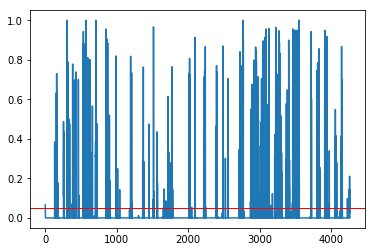

34 ainpcs_invvac_bc_value_d



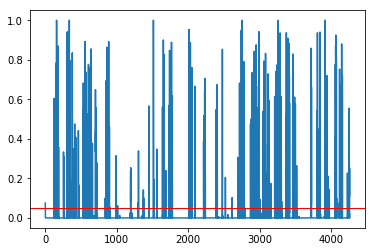

35 ainpcs_invvac_ca_value_d



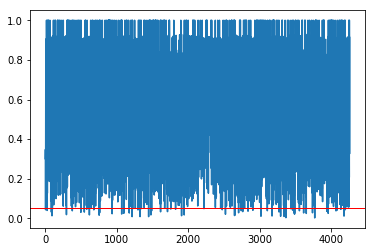

36 ainpcs_kwacnet_value_d



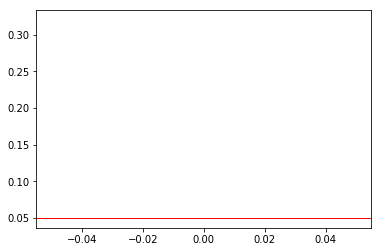

37 ainpcs_mainstateword_value_d



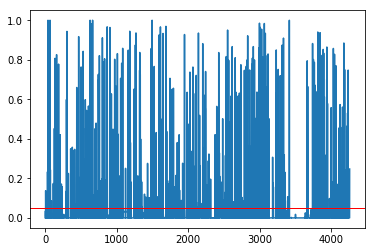

38 ainpcs_pcs100_moduleavail_valu_d



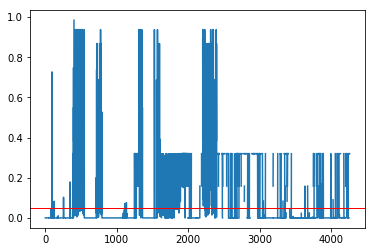

39 ainpcs_pcs_enclosuretemp_value_d



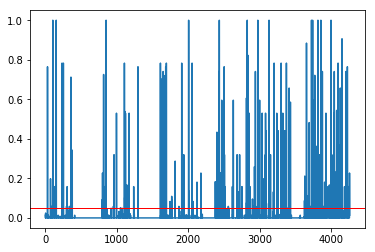

40 ainpcs_sod152_command_value_d



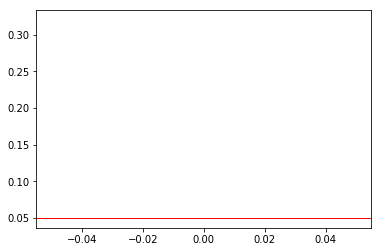

41 ainpcs_statuswordin1_value_d



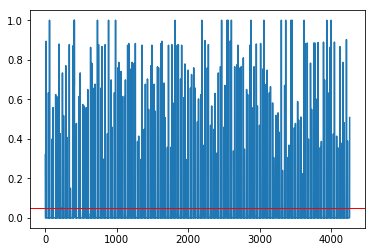

42 ainpcs_statuswordin2_value_d



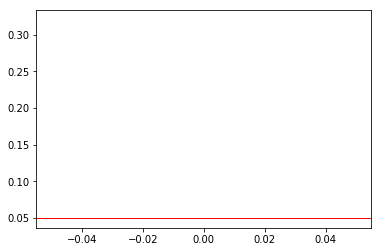

43 ainpcs_temp_value_d



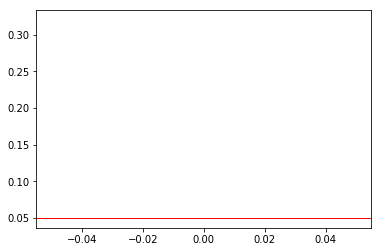

44 ainpcs_warningword_value_d



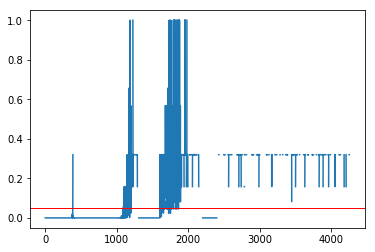

45 ainpcs_zt152_value_d



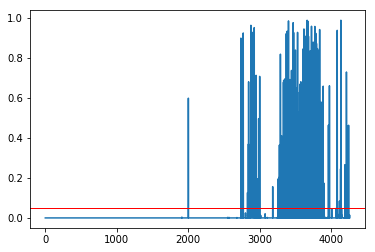

46 ainpdt012_value_d



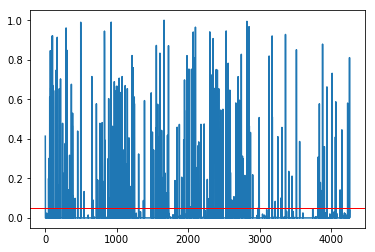

47 ainpdt110_value_d



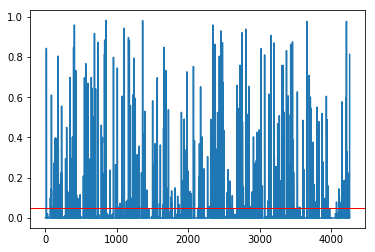

48 ainpdt402_value_d



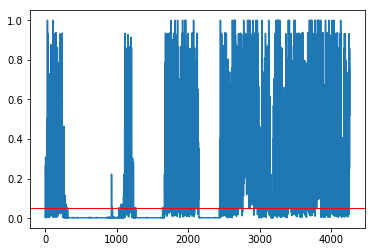

49 ainpowsetpt_value_d



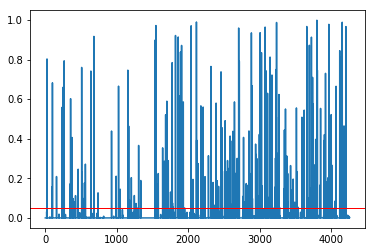

50 ainpt012_value_d



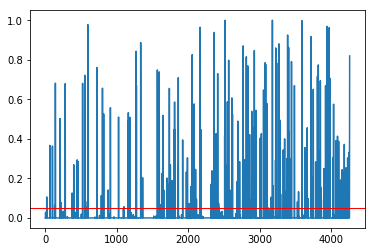

51 ainpt510_value_d



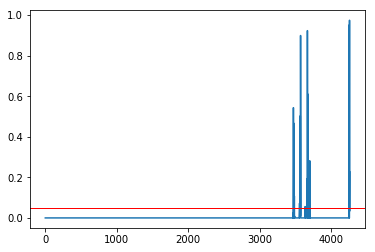

52 ainte001_value_d



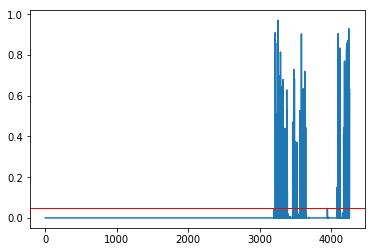

53 ainte002_value_d



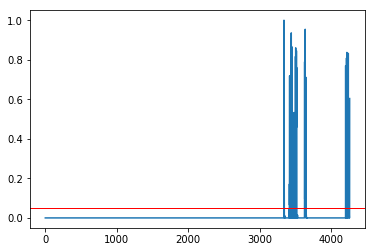

54 ainte005_value_d



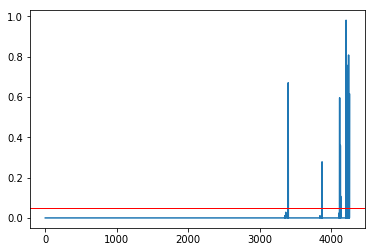

55 ainte010_value_d



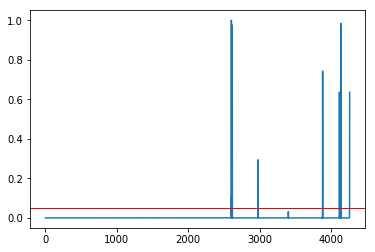

56 ainte011_value_d



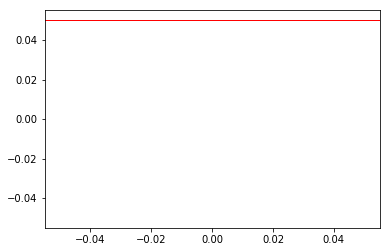

57 ainte012b_value_d



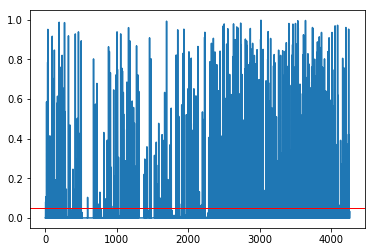

58 ainte012f_value_d



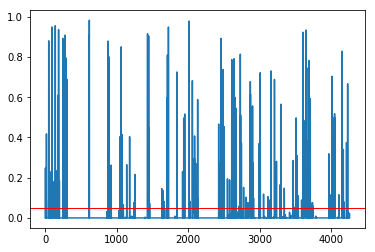

59 ainte120_value_d



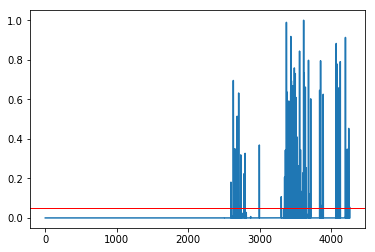

60 ainte150a_value_d



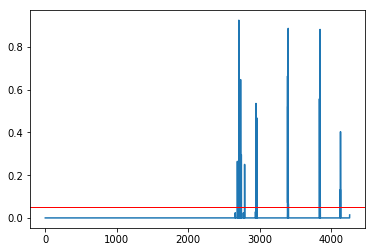

61 ainte150b_value_d



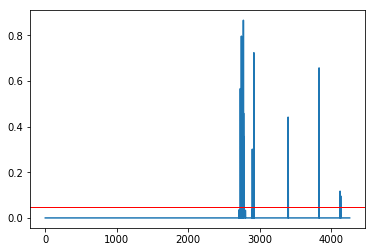

62 ainte161_value_d



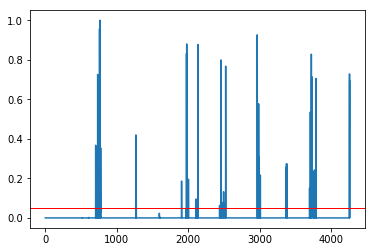

63 ainte310_value_d



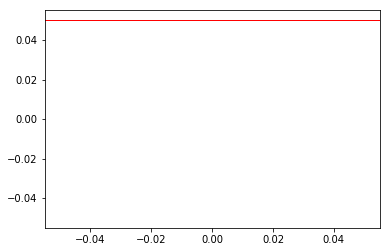

64 ainte320a_value_d



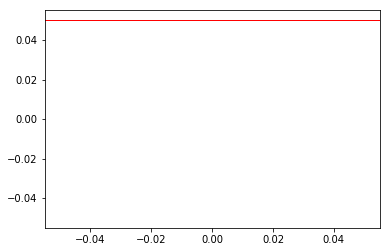

65 ainte320b_value_d



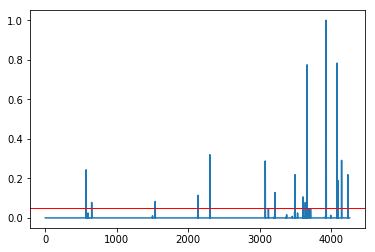

66 ainte321a_value_d



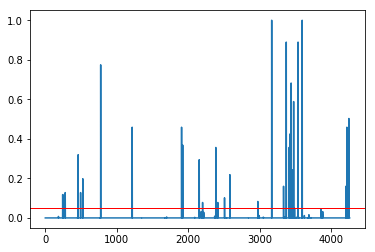

67 ainte321b_value_d



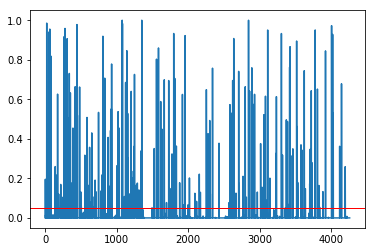

68 ainte330_value_d



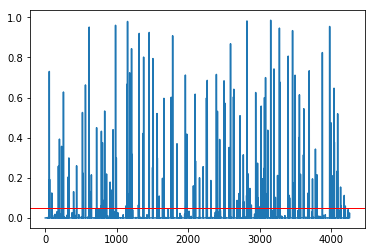

69 ainte400_value_d



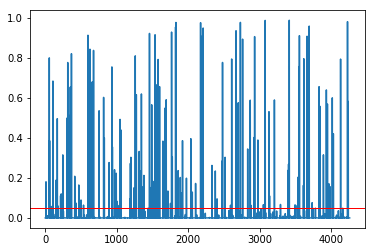

70 ainte400r_value_d



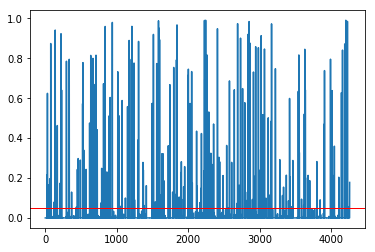

71 ainte401_value_d



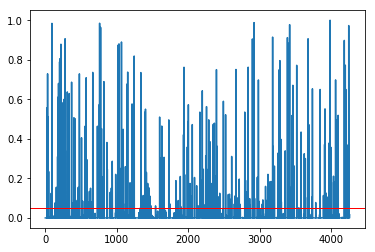

72 ainte401b_value_d



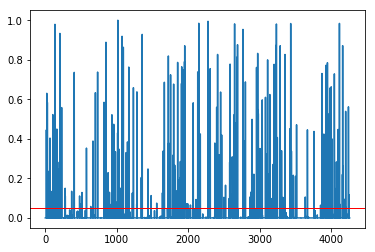

73 ainte431_value_d



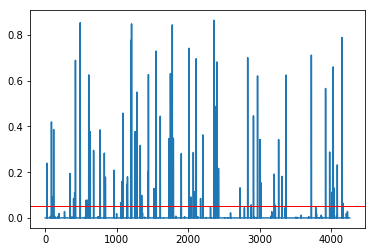

74 ainte490_value_d



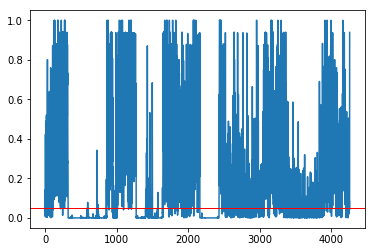

75 ainte490alt_value_d



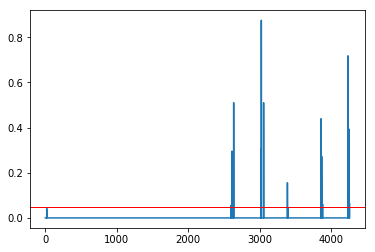

76 ainte800_value_d



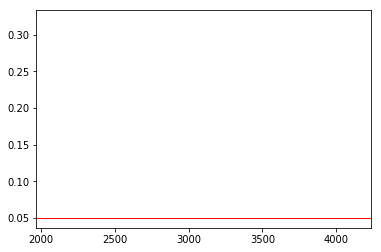

77 ainte800alt_value_d



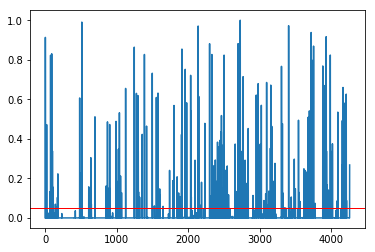

78 ainte820_value_d



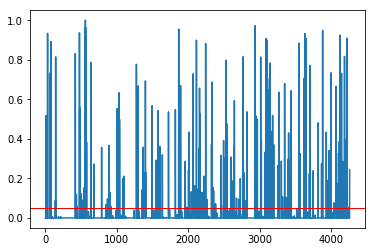

79 ainte832_value_d



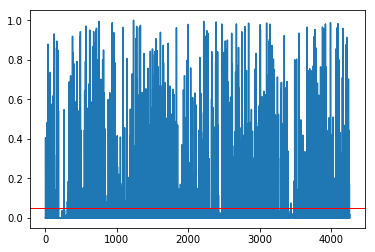

80 ainte900_value_d



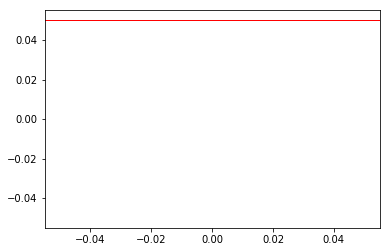

81 ainte900out_status_value_d



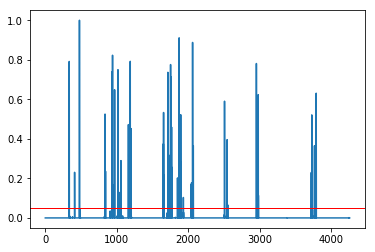

82 ainte910_value_d



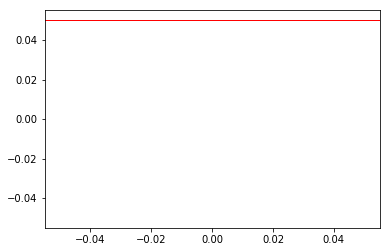

83 ainvsd110alarm_value_d



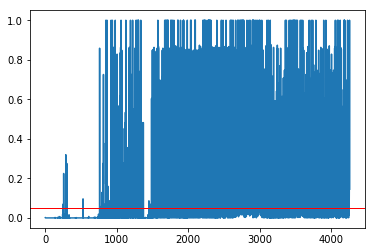

84 ainvsd110curr_value_d



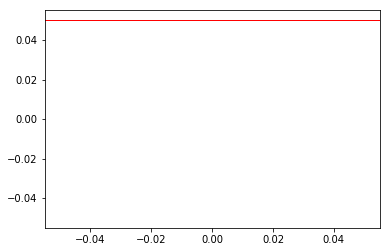

85 ainvsd110freq_value_d



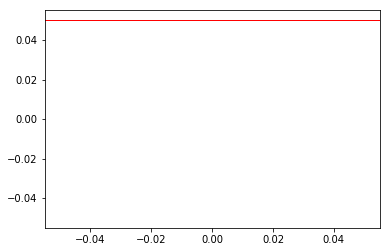

86 ainvsd140alarm_value_d



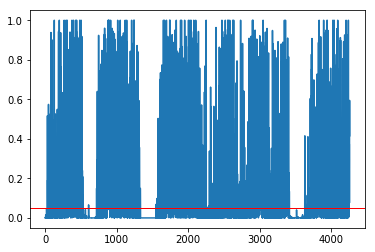

87 ainvsd140curr_value_d



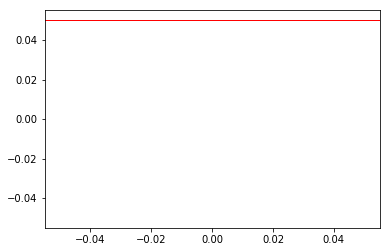

88 ainvsd140freq_value_d



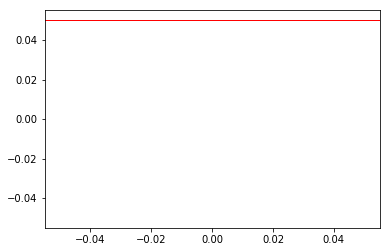

89 ainvsd150alarm_value_d



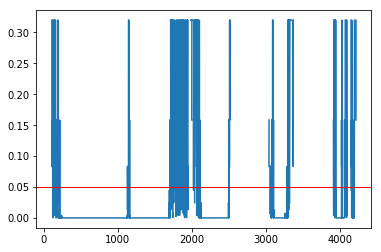

90 ainvsd150curr_value_d



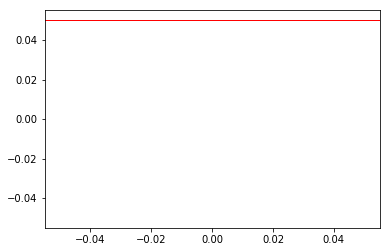

91 ainvsd151alarm_value_d



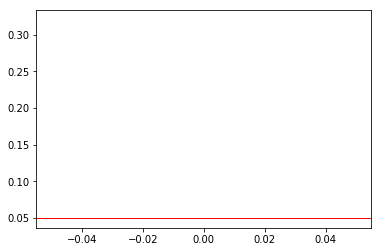

92 ainvsd151curr_value_d



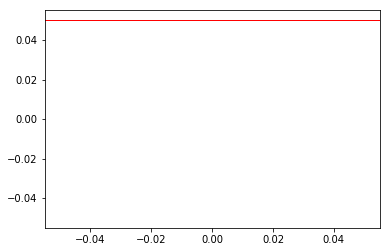

93 ainvsd151fault1_value_d



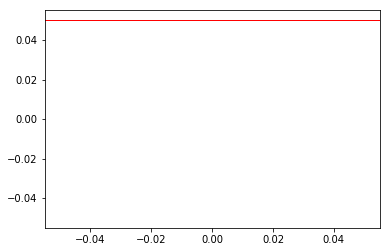

94 ainvsd160alarm_value_d



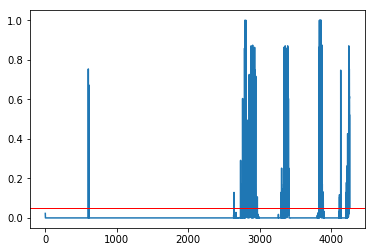

95 ainvsd160curr_value_d



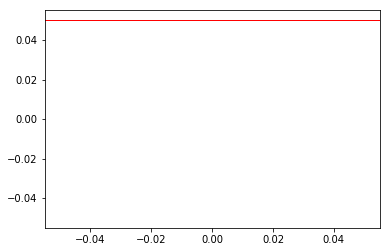

96 ainvsd400alarm_value_d



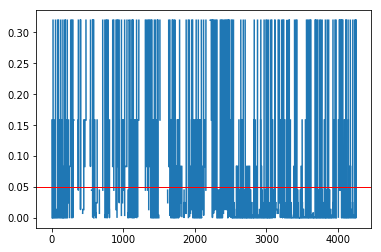

97 ainvsd400curr_value_d



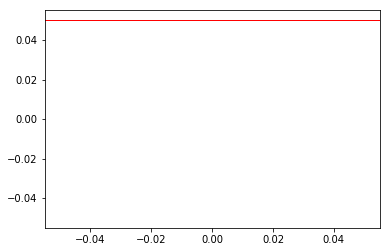

98 ainvsd400fault1_value_d



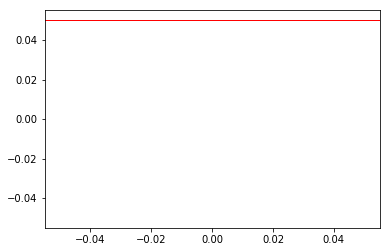

99 ainvsd450alarm_value_d



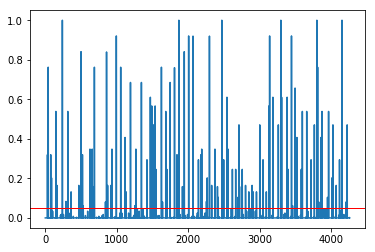

100 ainvsd450curr_value_d



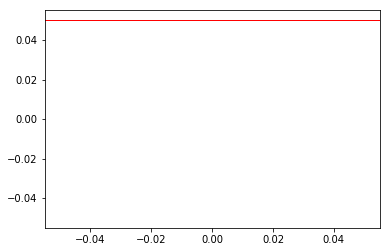

101 ainvsd450fault1_value_d



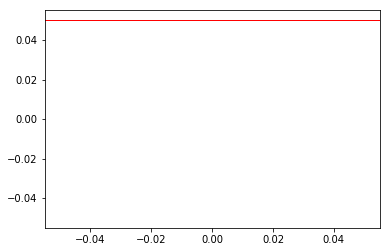

102 ainvsd451alarm_value_d



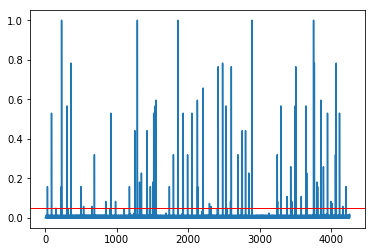

103 ainvsd451curr_value_d



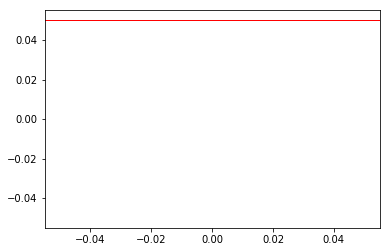

104 ainvsd451fault1_value_d



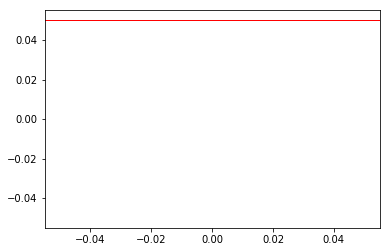

105 ainvsd451freq_value_d



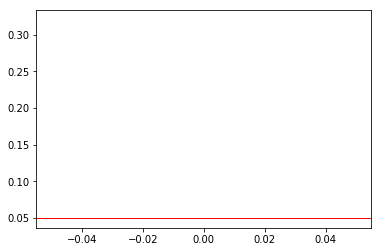

106 ainvsd800alarm_value_d



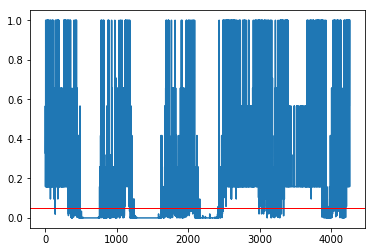

107 ainvsd800curr_value_d



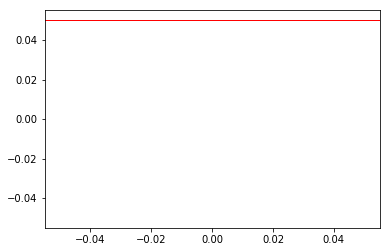

108 ainvsd800freq_value_d



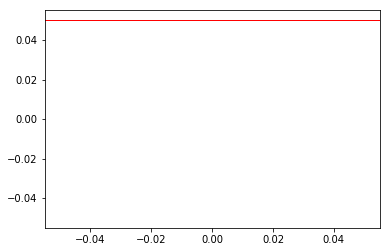

109 ainvsd830alarm_value_d



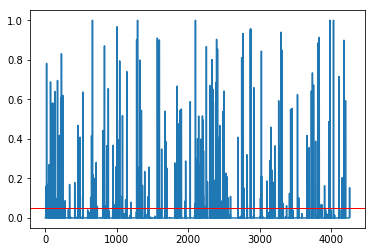

110 ainvsd830curr_value_d



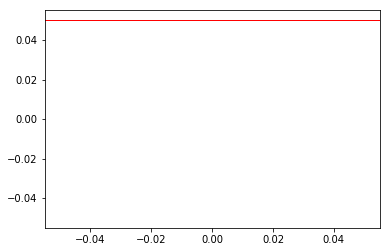

111 ainvsd830fault1_value_d



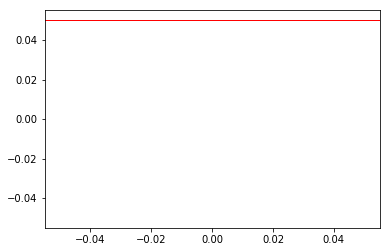

112 ainvsd830freq_value_d



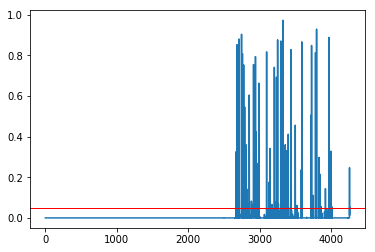

113 ainvt310a_value_d



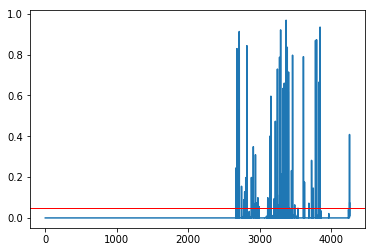

114 ainvt310b_value_d



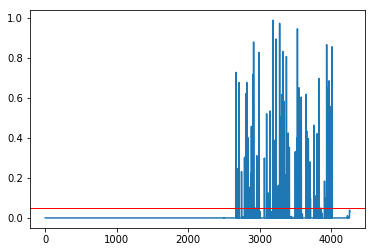

115 ainvt310c_value_d



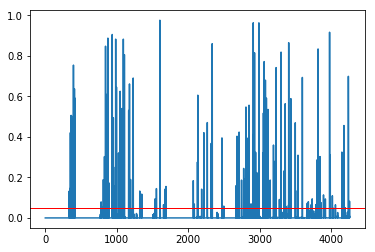

116 ainvt310d_value_d



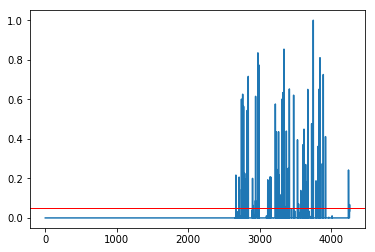

117 ainvt311a_value_d



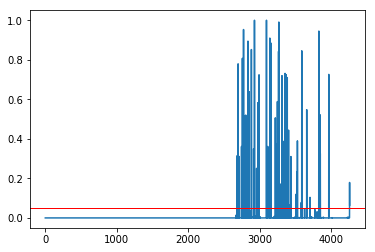

118 ainvt311b_value_d



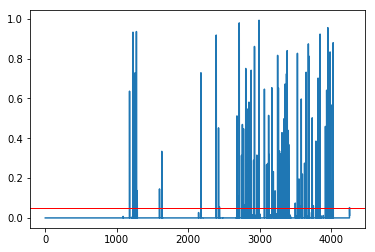

119 ainvt311c_value_d



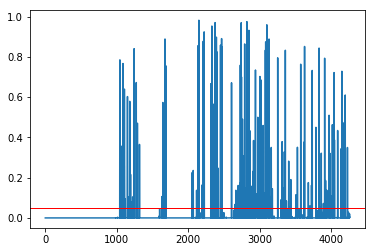

120 ainvt311d_value_d



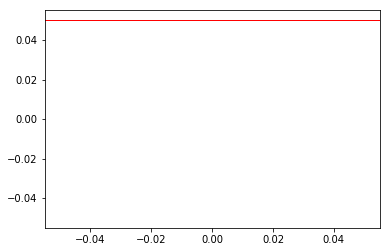

121 ainyat910_value_d



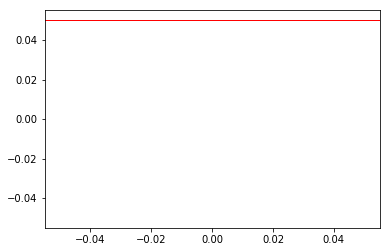

122 ainyat910spare_value_d



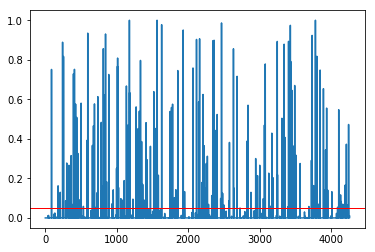

123 ainyte410a_value_d



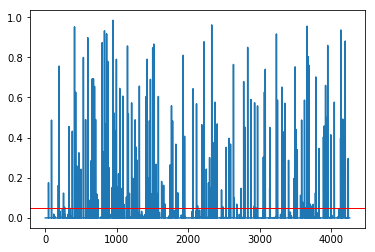

124 ainyte410b_value_d



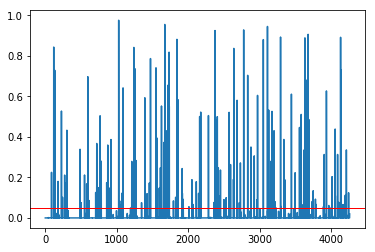

125 ainyte410c_value_d



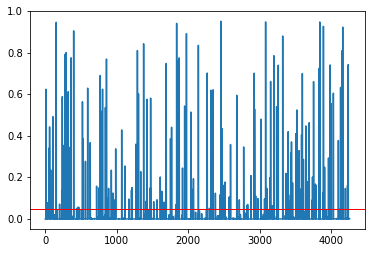

126 ainyte410d_value_d



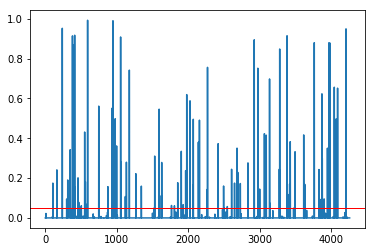

127 ainyte480_value_d



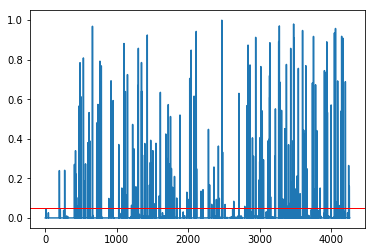

128 ainzt010_value_d



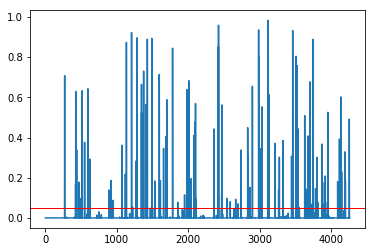

129 aoutejt010_value_d



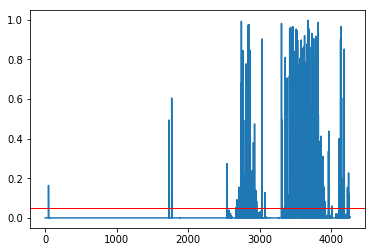

130 aoutfcv012_value_d



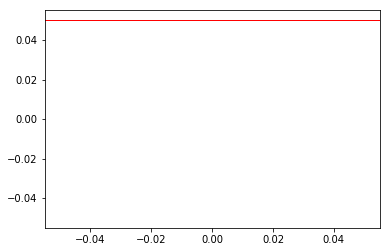

131 aoutfcv140_value_d



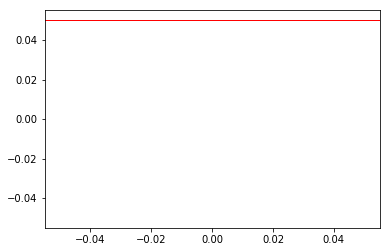

132 aouthtr002a_c_value_d



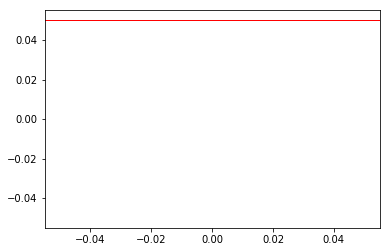

133 aoutpcs_dispkw_value_d



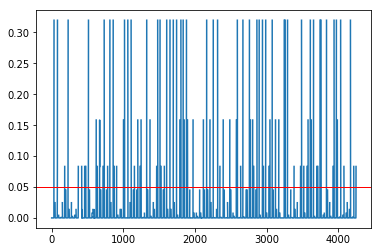

134 aoutpcs_gencontrolword_value_d



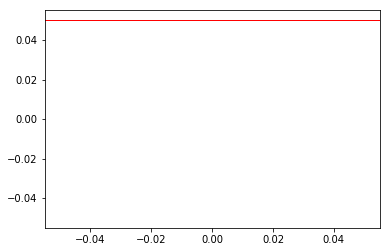

135 aoutsod150_value_d



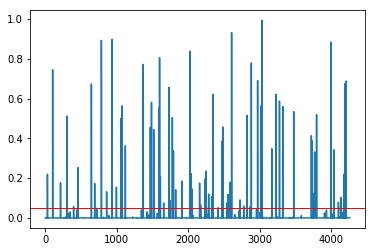

136 aouttcv400_value_d



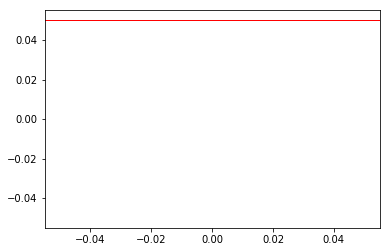

137 aouttcv480_value_d



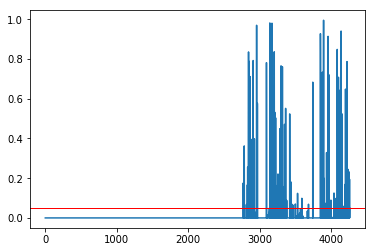

138 aoutvsd110_value_d



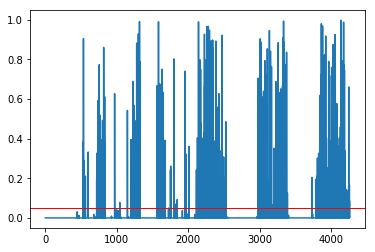

139 aoutvsd140_value_d



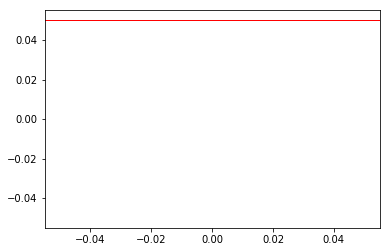

140 aoutvsd151_value_d



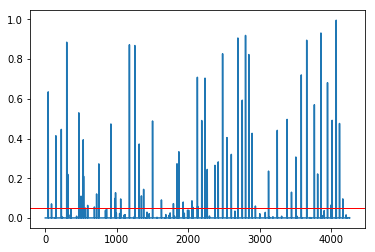

141 aoutvsd451_value_d



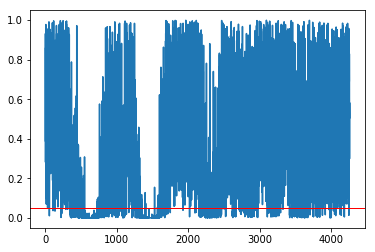

142 aoutvsd800_value_d



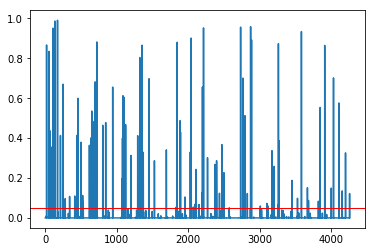

143 aoutvsd830_value_d



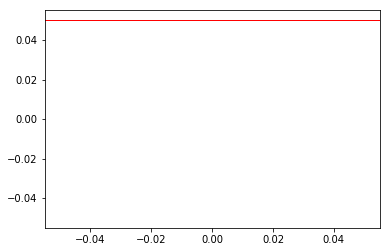

144 cl010_leadlaga_output_d



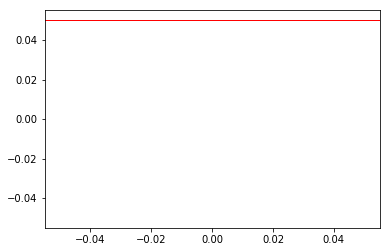

145 cl012_digfiltera_output_d



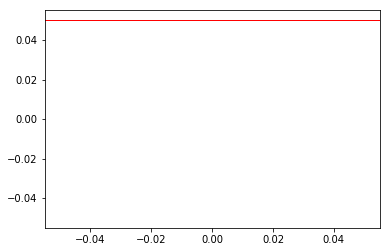

146 cl012_digfilterb_output_d



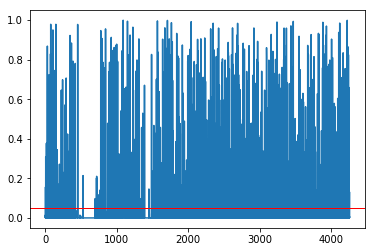

147 cl012_leadlaga_output_d



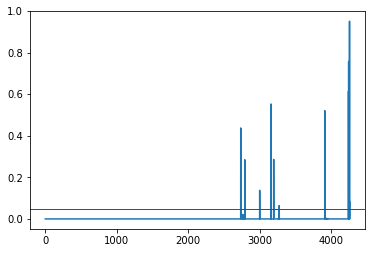

148 cl012_leadlagb_output_d



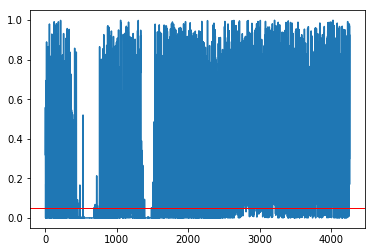

149 cl012_leadlagc_output_d



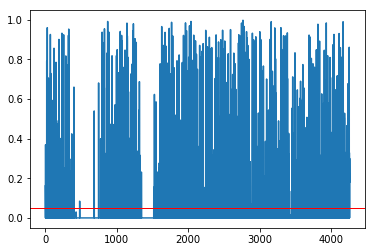

150 cl012_leadlagd_output_d



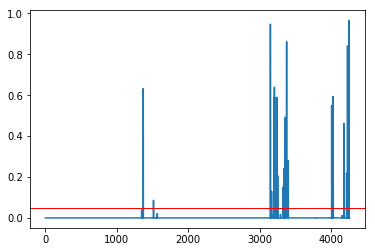

151 cl012_pi01_min_d



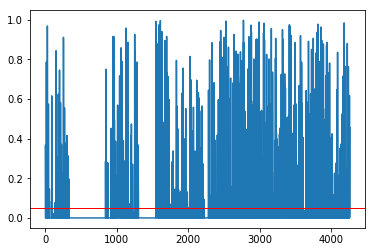

152 cl012_pi01_sp_d



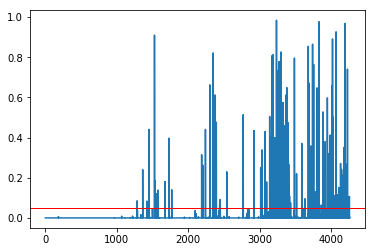

153 cl012_pi02_sp_d



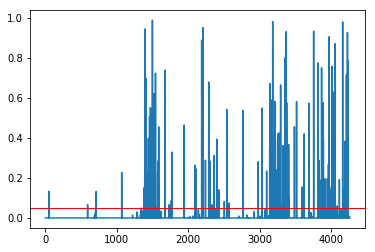

154 cl012_tempfact_d



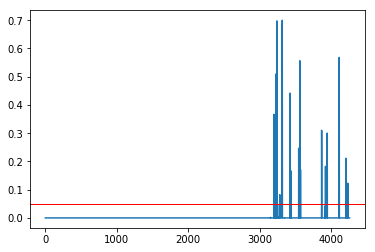

155 cl110_clogratio_d



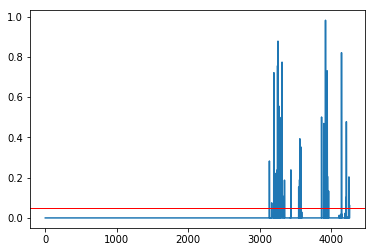

156 cl110_correctionfactor_d



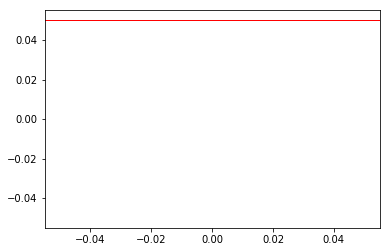

157 cl110_leadlaga_output_d



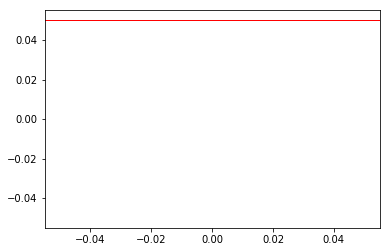

158 cl110_leadlagb_output_d



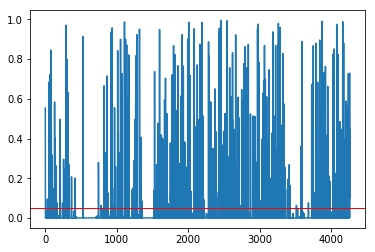

159 cl110_pssflowcalc_d



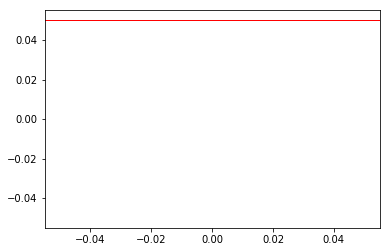

160 cl110_ramp_output_d



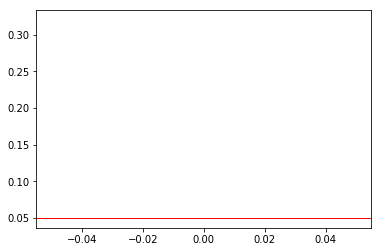

161 cl140_ffvalue_d



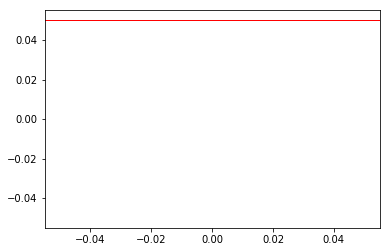

162 cl140_leadlaga_output_d



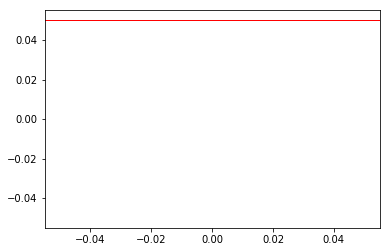

163 cl140_leadlagb_output_d



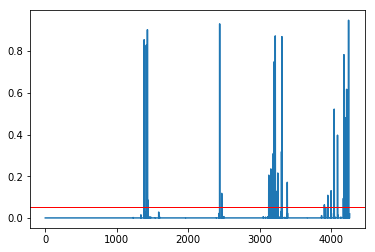

164 cl140_pi01_sp_d



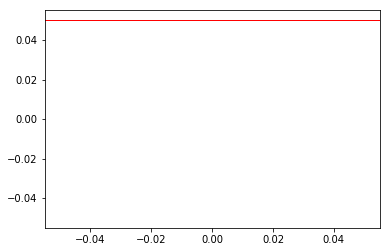

165 cl140_vsd110delta_d



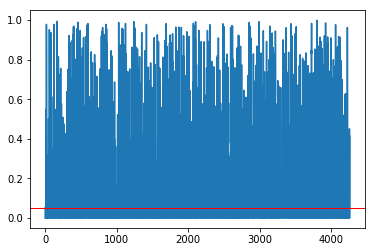

166 cl400_htrkw_d



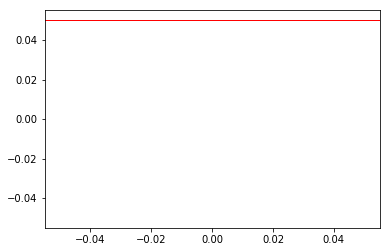

167 cl400_pi01_ramp_sp_d



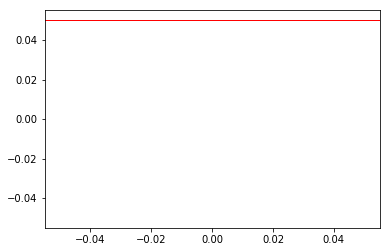

168 cl400_pi01_sp_d



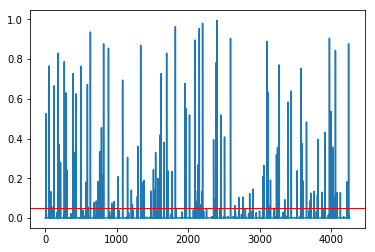

169 cl400_pi02_sp_d



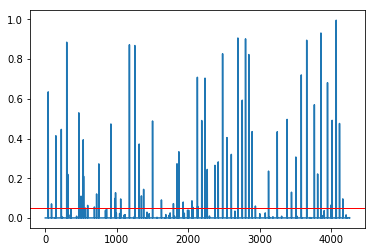

170 cl451_pi01_output_d



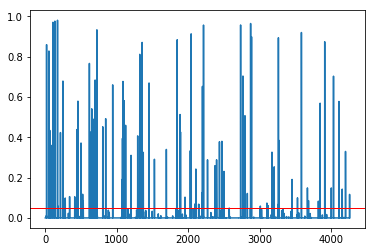

171 cl830_pi02_output_d



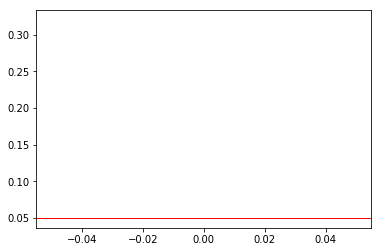

172 cl_erfb_pwr_d



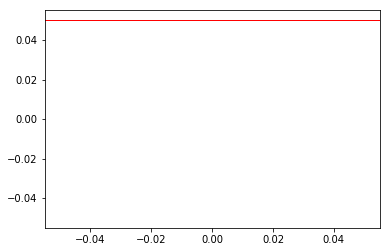

173 cl_vsd110fb_output_d



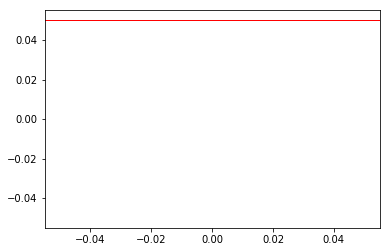

174 cl_wtsfb_output_d



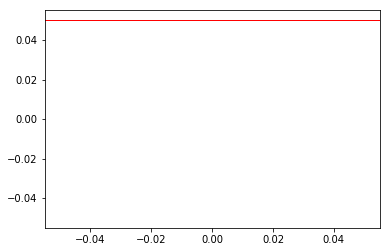

175 config_idleattemptcount_d



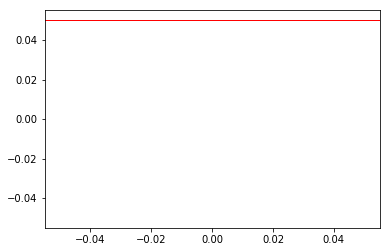

176 config_idletranscount_d



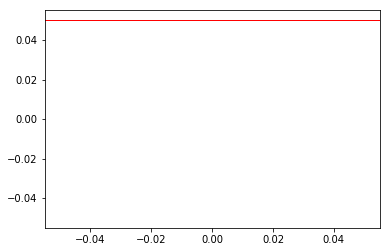

177 cp_anodconf_d



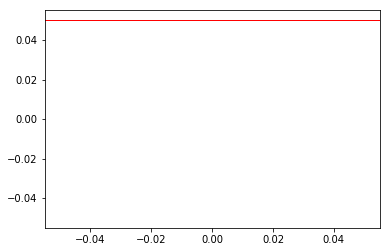

178 cp_avgpower_d



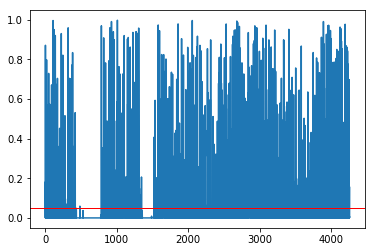

179 cp_bairsd_d



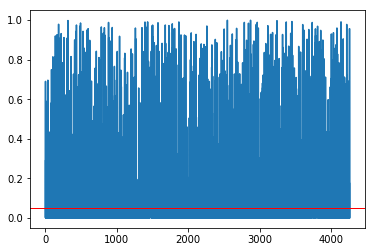

180 cp_burner_er_d



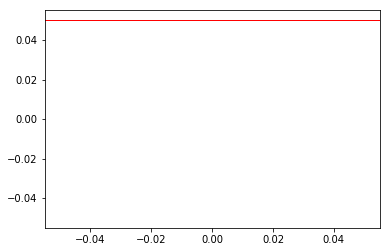

181 cp_csaevent2_d



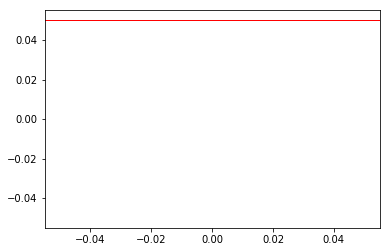

182 cp_diagnostic_ee_d



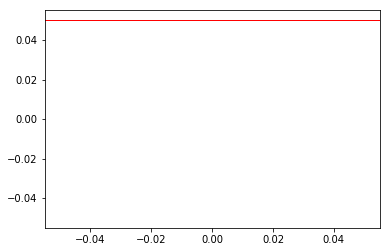

183 cp_downtransminvolt_d



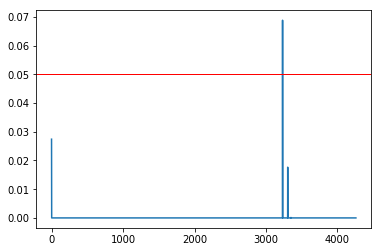

184 cp_eff_elec_d



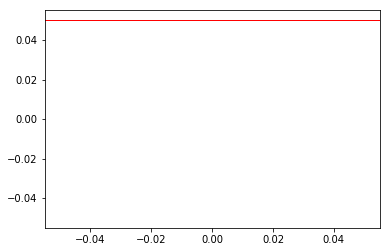

185 cp_ejt010psat_d



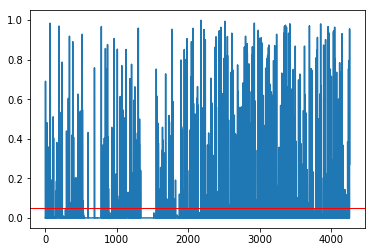

186 cp_ejt010s2ctempfact_d



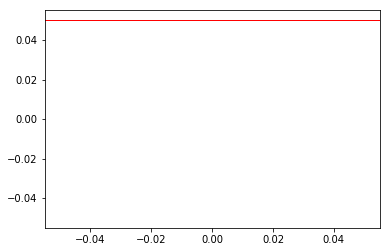

187 cp_ejt010specgravity_d



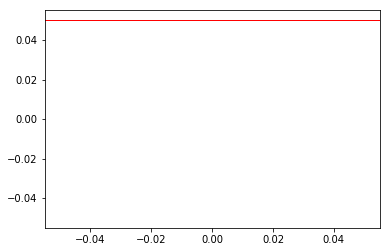

188 cp_ejt010steamflow_d



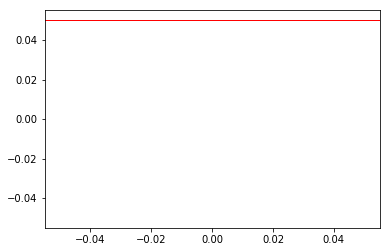

189 cp_ejt010steamtemp_d



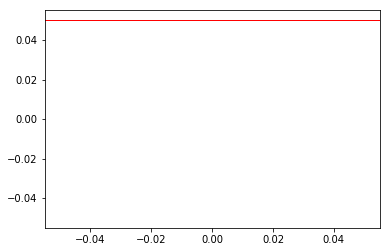

190 cp_failedstart_cnt_d



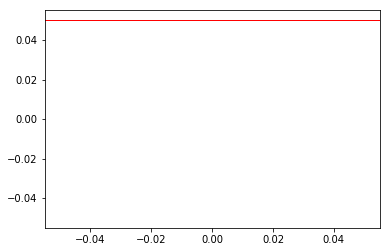

191 cp_fil110cloggedbaseload_d



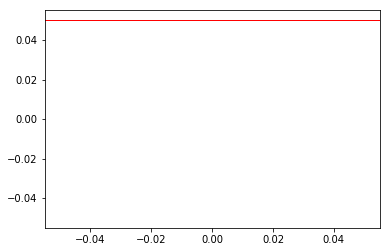

192 cp_fil110nearclogbaseload_d



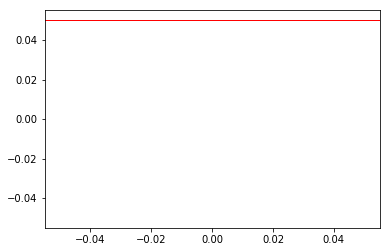

193 cp_forced_shdwn_cnt_d



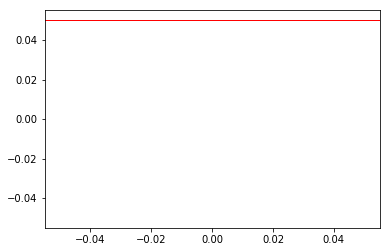

194 cp_fs400latch_d



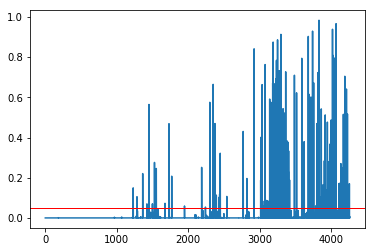

195 cp_ft012act_d



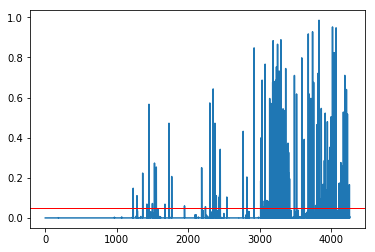

196 cp_ft012eff_d



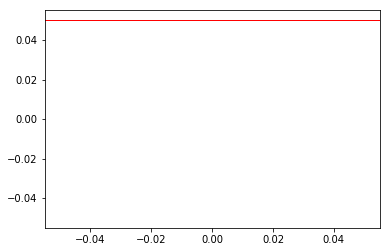

197 cp_ft012err_d



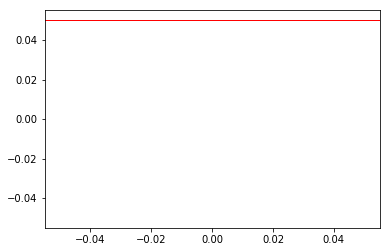

198 cp_ft012min_d



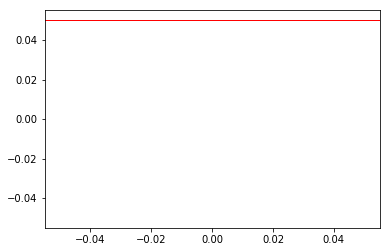

199 cp_fuelconf_d



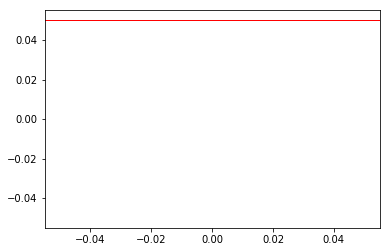

200 cp_fuelstarve_d



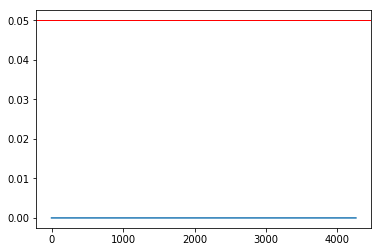

201 cp_fueltot_d



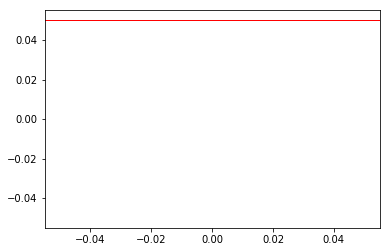

202 cp_gctoidleatmpt_d



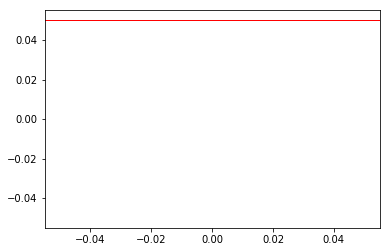

203 cp_gctranssuccess_d



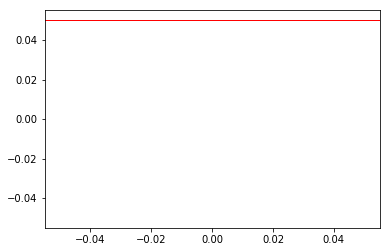

204 cp_hot_shdwn_unmit_cnt_d



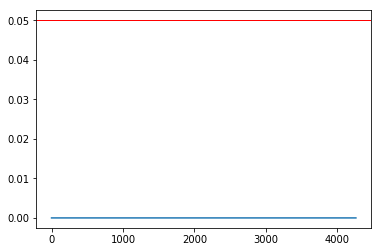

205 cp_hothrs250_d



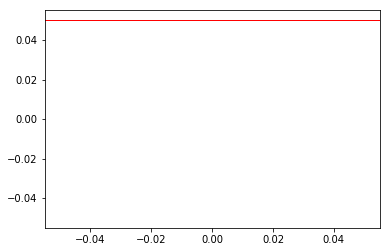

206 cp_hotstart_cnt_d



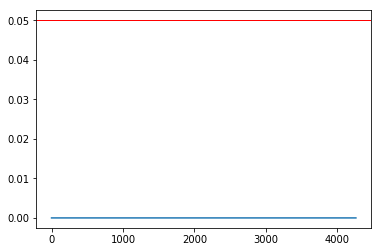

207 cp_hottime_d



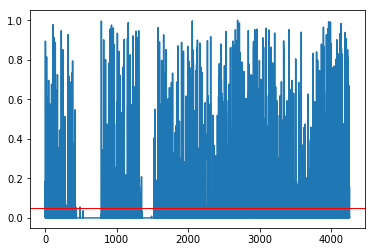

208 cp_idc_d



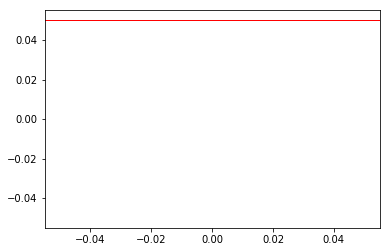

209 cp_idcnet_d



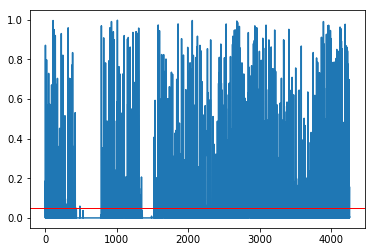

210 cp_idcnorm_d



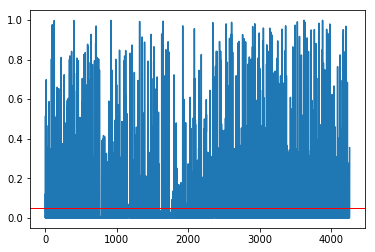

211 cp_kwdc_d



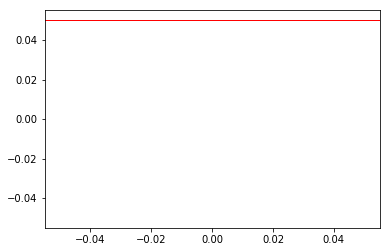

212 cp_lcv452_li_d



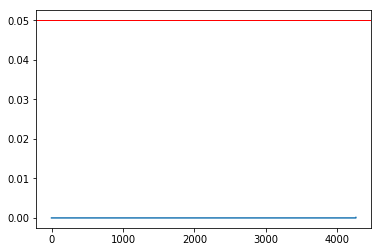

213 cp_lcv452ct_d



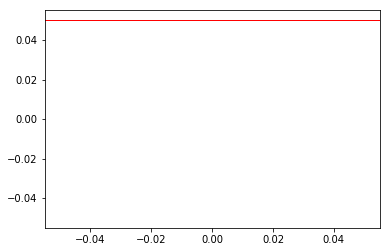

214 cp_lcv452ctl_d



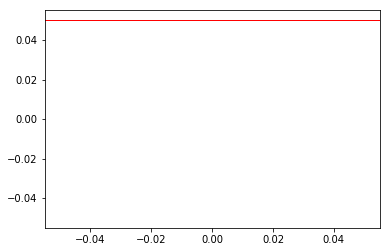

215 cp_loadsd_cnt_d



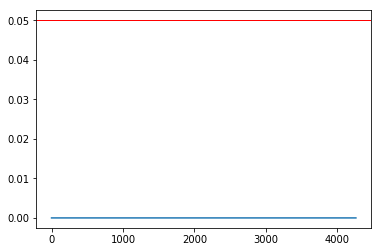

216 cp_loadtime_d



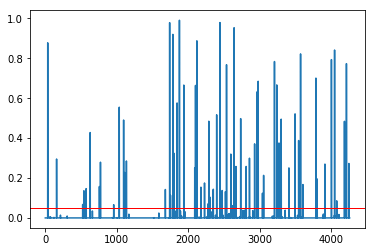

217 cp_lt450ft_d



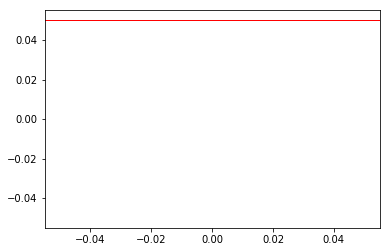

218 cp_maxidc_d



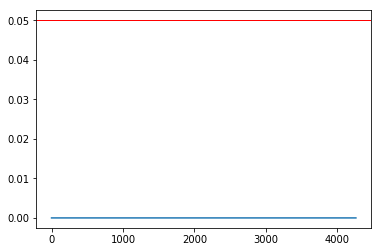

219 cp_mwhrsnet_d



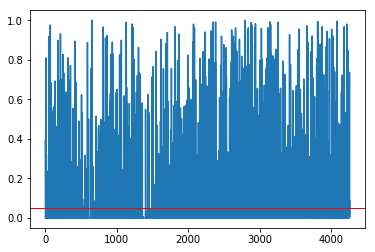

220 cp_pdt110utilo2_d



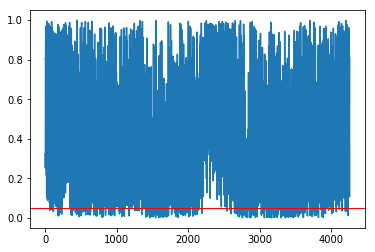

221 cp_pfact_d



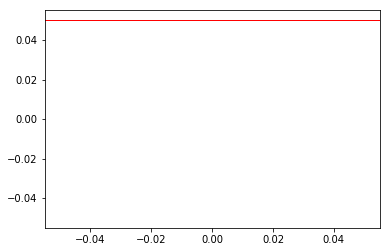

222 cp_phimon_d



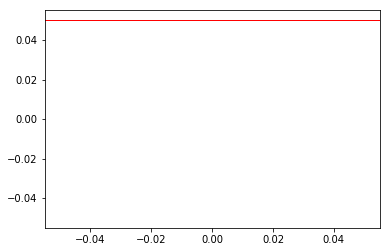

223 cp_pt012del_d



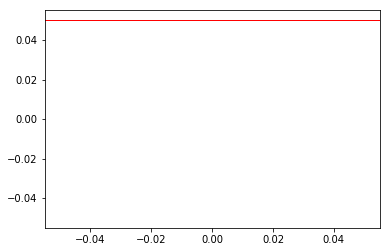

224 cp_run_decay_d



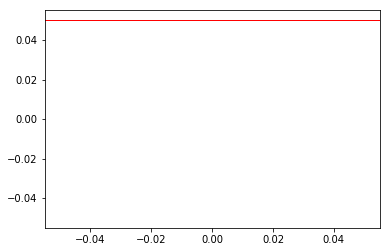

225 cp_sd_decay_d



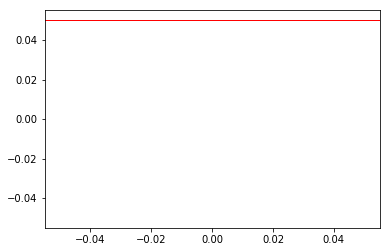

226 cp_sepdel_d



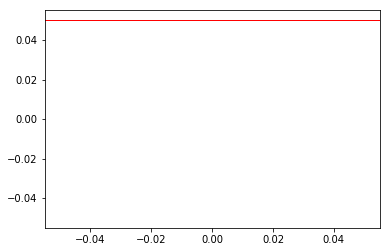

227 cp_sepdel_sd_d



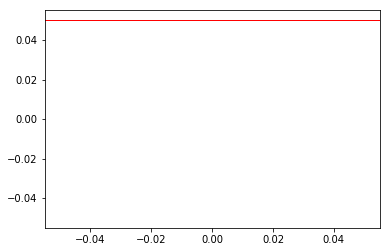

228 cp_shdwn_cnt_d



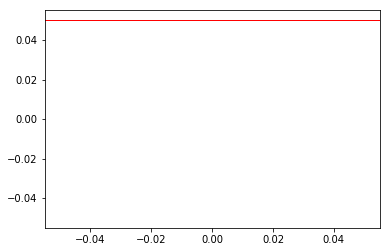

229 cp_start_cnt_d



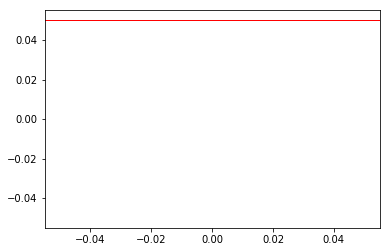

230 cp_starttemp_d



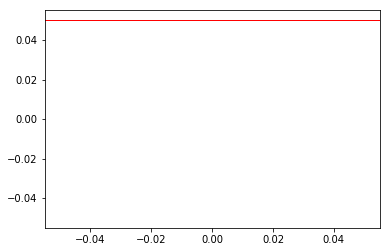

231 cp_startvdc_d



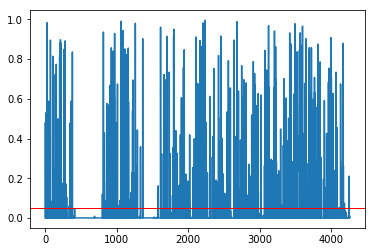

232 cp_steam2carbon_d



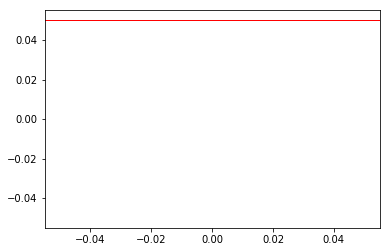

233 cp_te002ft_d



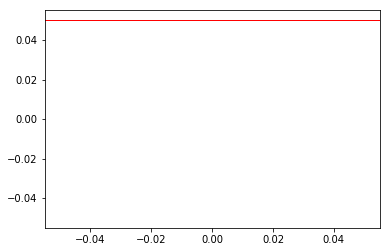

234 cp_te005ft_d



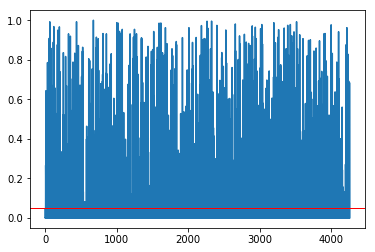

235 cp_te012avg_d



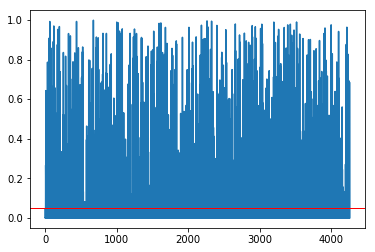

236 cp_te012ft_d



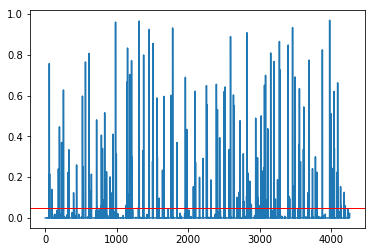

237 cp_te400ft_d



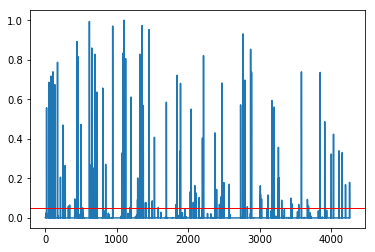

238 cp_te431_limit_d



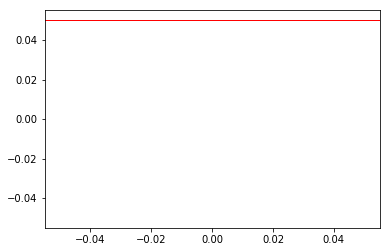

239 cp_uh2_utilization_d



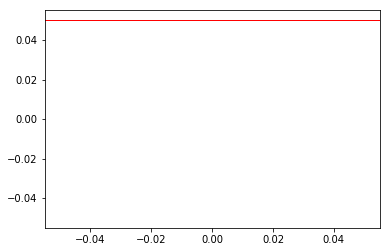

240 cp_vdctot_cell_d



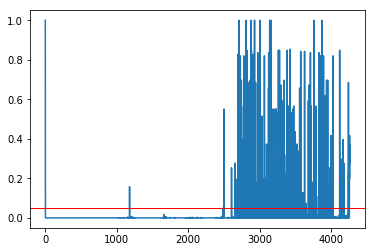

241 cp_vdctot_d



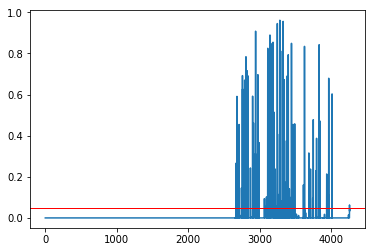

242 cp_vdctota_d



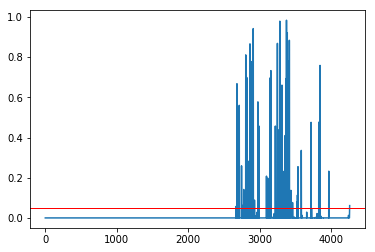

243 cp_vdctotb_d



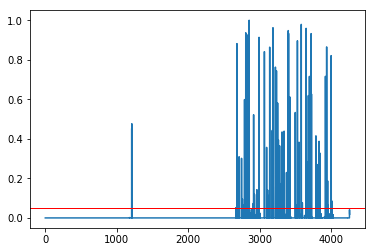

244 cp_vdctotc_d



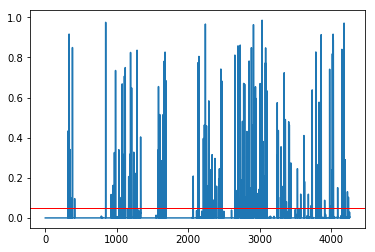

245 cp_vdctotd_d



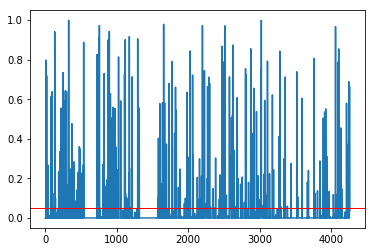

246 cp_vdctotdelab_d



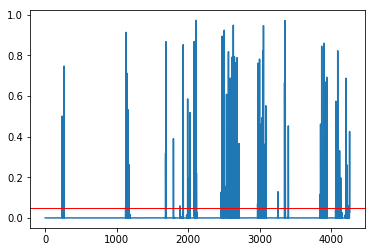

247 cp_vdctotdelac_d



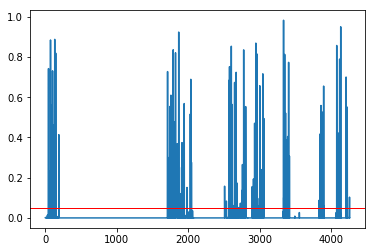

248 cp_vdctotdelad_d



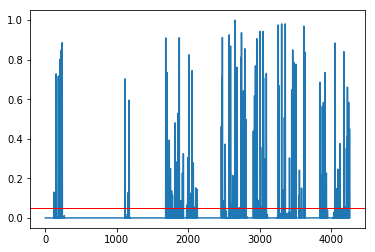

249 cp_vdctotdelbc_d



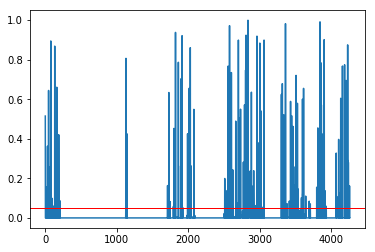

250 cp_vdctotdelbd_d



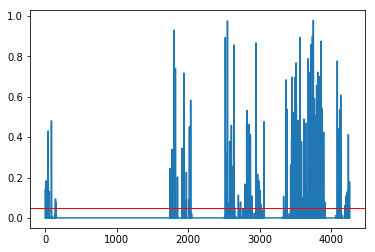

251 cp_vdctotdelcd_d



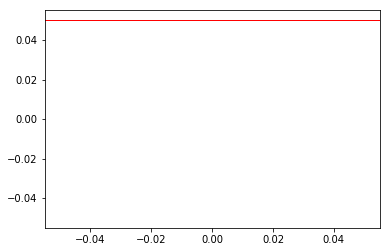

252 cp_vdctotmean_d



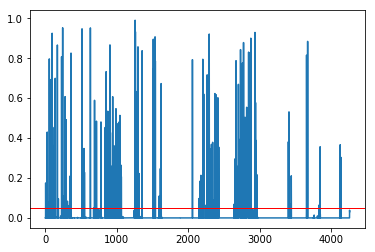

253 cp_vt310dela_d



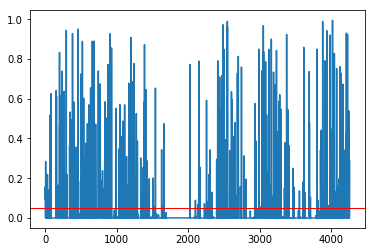

254 cp_vt310delb_d



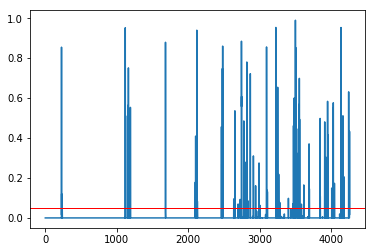

255 cp_vt310delc_d



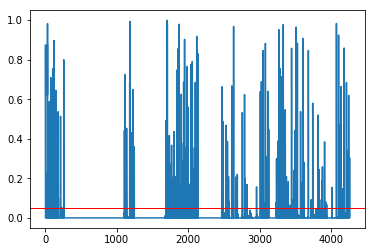

256 cp_vt310deld_d



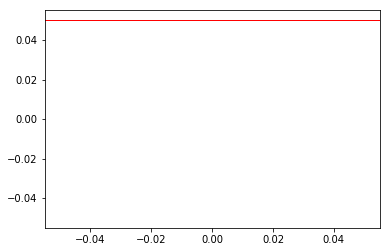

257 cp_wair_d



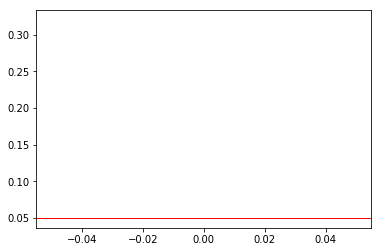

258 cp_wd_lor_d



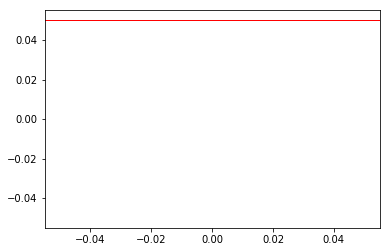

259 cp_wtsfb_d



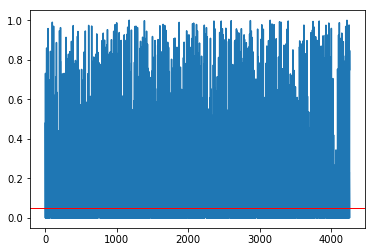

260 cp_zt010del_d



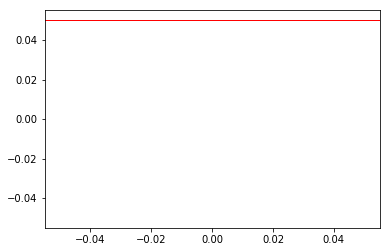

261 vsd110_output_d



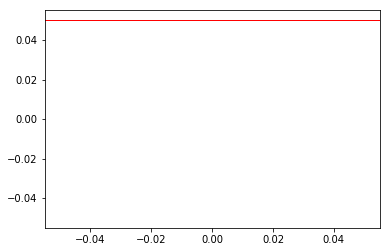

262 vsd400_output_d



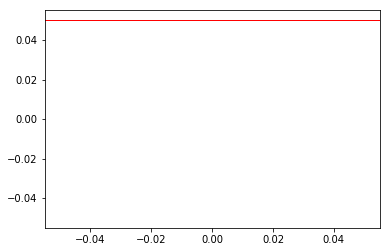

263 vsd800_output_d



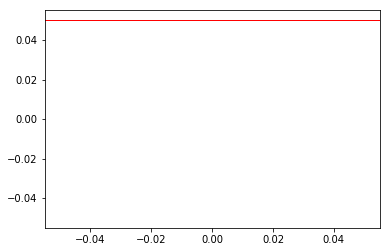

264 vsd830_output_d



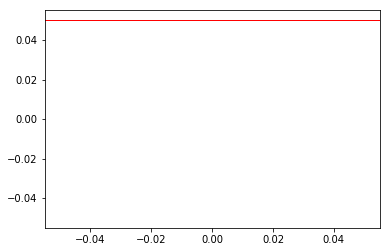

265 cp_te001ft_d



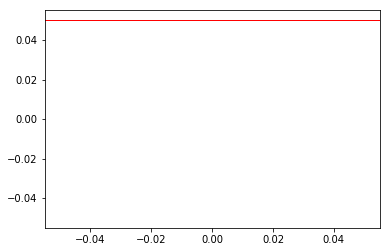

266 cp_vsd451di_d




In [125]:
for i in tqdm_notebook(range(len(features98feb))):
    
    feature=features98feb[i]
    
    p_value_list=[]
    to600=st98_feb_normal_600[feature].tolist() # data from 0 to 600 is normal
    
    for k in range(len(st98_feb_pre)//600): # of rotation = 4260    

        df_pre_600=st98_feb_pre[len(st98_feb_pre)-600*(k+1):len(st98_feb_pre)-600*k] #devide data by 600
        to_shutdown=df_pre_600[feature].tolist()

        result = stats.ttest_rel(to600, to_shutdown) #t-test
        p_value_list.append(result[1])
        #print('t-statistics : %.3f / p-value : %.4f'%(result))

    plt.plot(p_value_list)
    plt.axhline(y=0.05, color='r', linewidth=1)
    plt.show()
    print(str(i),feature)
    print()

# as a result, column like ainft000hrm_value_d has a valid result in t-test 
: There is different between 21-feb-2019 10 min data and the data right before shutdown.